# COGS 108 - Final Project 

# Overview

This project analyzes how San Diego County's Parks Master Plan effects the safety of residents of San Diego. Specifically, to see if the Crime Prevention Through Environmental Design"(CPTED) policy in the Parks Master Plan improves the safety of the general public, this project anaylzes multiple years of the county's crime reports to see if this policy is improving public safety. From the analysis, it shows that crime rates have decreased overtime but when analyzing year to year, crime rates vary between increasing and decreasing. 

# Name & GitHub ID

- Name: Patrick Liu
- GitHub Username: starfizhpat

# Research Question

Has the "Crime Prevention Through Environmental Design"(CPTED) policy in the Parks Master Plan help decrease the crime rates in the county of San Diego?

## Background and Prior Work

To start, the first thing to understand is the County of San Diego's Park master plan. It takes into account the many parks and recreational areas in the county and determines what the best course of action is to maintain and improve its longevity. However, while doing this, the county must also take into account it's many county policies and ordinances and incorporate them into said plans. The main policy that this project will be focusing on is "Crime Prevention Through Environmental Design". This policy basically requires the design of the county's parks and recreational facilities to follow three principles: natural surveillance, natural access control,and territorial reinforcement[1]. Natural surveillance is the idea of "minimizing ambush points and enabling the unobstructed observation of people with malevolent intent"[5]. Natural access control is the idea of how to incorporate "pathways, lighting and other means to direct traffic and define spaces for use"[5]. Fianlly, territorial reinforcement is the idea of defining the seperation of private and public lands using barriers[5]. By practicing these three principles, the park's master plan should help make the county of San Diego a safer place.

To measure the safeness we will basically need the log of reports from the San Diego Police Department(SDPD). How it works each report contains the location, time and type of incident. The location is represented by a "beat" which a unique three digit number that represents a neighborhood in the county. The time is just the typical 24 time and date representation. The type is represented by a priority and a disposition[4]. Priority is the urgency of the service and is the assigned by the dispatcher. This consists of five levels: E, 1, 2, 3, 4. E is the highest priority and means that there is an imminent threat to life. 1 is the next priority that involves serious crimes in progress and threats to life. 2 and 3 both involve complaints and minor crimes with no threat to life. 4 is the least serious of the priorities that involve minor requests for police services[3]. Disposition is the outcome of each service; this includes arrests made, reports taken, stolen/recovered vehicle, duplicate calls, and canceled calls[2].     

References (include links):
- 1) https://www.sdparks.org/content/dam/sdparks/en/pdf/Development/Parks%20Master%20Plan.pdf
- 2) http://seshat.datasd.org/pd/pd_dispo_codes_datasd.csv
- 3) http://seshat.datasd.org/pd/pd_cfs_priority_defs_datasd.pdf
- 4) https://data.sandiego.gov/datasets/police-calls-for-service/
- 5) https://www.buildings.com/articles/28187/implement-these-security-and-access-control-tips#:~:text=CPTED%20is%20a%20layered%20approach,notice%20anything%20out%20of%20place.

# Hypothesis


I believe that the the CPTED policy will have reduced the crime rate in the San Diego County after each given year. Given the principles of the policy and the span of the datasets from 2015 to 2020,  find it plausible that there would have been enough time to see effects the policy has had on crime rates.

# Dataset(s)

Dataset 1:
- Dataset Name: Police Calls for Service 2015
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 608434

This data set provides all the services calls to the SDPD in 2015.

Dataset 2:
- Dataset Name: Police Calls for Service 2016
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 586703

This data set provides all the services calls to the SDPD in 2016.

Dataset 3:
- Dataset Name: Police Calls for Service 2017
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 580577

This data set provides all the services calls to the SDPD in 2017.

Dataset 4:
- Dataset Name: Police Calls for Service 2018
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 570459

This data set provides all the services calls to the SDPD in 2018.

Dataset 5:
- Dataset Name: Police Calls for Service 2019
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 590967

This data set provides all the services calls to the SDPD in 2019.

Dataset 6:
- Dataset Name: Police Calls for Service 2020
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 539456

This data set provides all the services calls to the SDPD in 2020.

I plan to clean thes data sets to get reports based on higher dispositions, higher priority calls and valid beats and compare the differences between each set to see if there is a change. 

# Setup

In [1]:
#imports
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
   
import seaborn as sns
sns.set()
sns.set_context('talk')

In [2]:
#read data 
df_pd_2015 = pd.read_csv("pd_calls_for_service_2015_datasd_v1.csv")
df_pd_2016 = pd.read_csv("pd_calls_for_service_2016_datasd_v1.csv")
df_pd_2017 = pd.read_csv("pd_calls_for_service_2017_datasd_v1.csv")
df_pd_2018 = pd.read_csv("pd_calls_for_service_2018_datasd.csv")
df_pd_2019 = pd.read_csv("pd_calls_for_service_2019_datasd.csv")
df_pd_2020 = pd.read_csv("pd_calls_for_service_2020_datasd.csv")

# Data Cleaning

In [3]:
#drop unnecessary columns 
df_pd_2020 = df_pd_2020.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_number_primary', 
                                      'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 
                                      'address_dir_intersecting', 'address_sfx_intersecting', 'address_road_intersecting', 
                                      'call_type'])
df_pd_2019 = df_pd_2019.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_number_primary', 
                                      'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 
                                      'address_dir_intersecting', 'address_sfx_intersecting', 'address_road_intersecting', 
                                      'call_type'])
df_pd_2018 = df_pd_2018.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_number_primary', 
                                      'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 
                                      'address_dir_intersecting', 'address_sfx_intersecting', 'address_road_intersecting', 
                                      'call_type'])
df_pd_2017 = df_pd_2017.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_number_primary', 
                                      'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 
                                      'address_dir_intersecting', 'address_sfx_intersecting', 'address_road_intersecting', 
                                      'call_type'])
df_pd_2016 = df_pd_2016.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_number_primary', 
                                      'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 
                                      'address_dir_intersecting', 'address_sfx_intersecting', 'address_road_intersecting', 
                                      'call_type'])
df_pd_2015 = df_pd_2015.drop(columns=['incident_num', 'date_time', 'day_of_week', 'address_number_primary', 
                                      'address_dir_primary', 'address_road_primary', 'address_sfx_primary', 
                                      'address_dir_intersecting', 'address_sfx_intersecting', 'address_road_intersecting', 
                                      'call_type'])

In [4]:
#drop NaN values in the sets
df_pd_2015 = df_pd_2015.dropna()
df_pd_2016 = df_pd_2016.dropna()
df_pd_2017 = df_pd_2017.dropna()
df_pd_2018 = df_pd_2018.dropna()
df_pd_2019 = df_pd_2019.dropna()
df_pd_2020 = df_pd_2020.dropna()

In [5]:
#cleans the priority column s.t. only int values were returned
def clean_priority(x):
    if type(x) is str:
        if 'E' in x:
            return 0
        if 'P' in x:
            x = x.strip('P')
        if 'nan' in x:
            return None
    if x == None:
        return None
    if type(x) is float:
        if m.isnan(x):
            return None
    
    return int(x)

#cleans the disposition column s.t. only valid dispositions were kept
def clean_dis(x):
    x = str(x)
    if x == "A":
        return x
    if x == "AB":
        return x
    if x == "AHR":
        return x
    if x == "R":
        return x
    if x == "RB":
        return x
    if x == "RHR":
        return x
    if x == "S":
        return x
    if x == "O":
        return x
    if x == "OHR":
        return x
    if x == "K":
        return x
    if x == "KB":
        return x
    if x == "KHR":
        return x
    
    return None

# cleans the beat column s.t. int is returned
def clean_beat(x):
    if type(x) is float:
        try:
            return int(x)
        except:
            return None
    if type(x) is str:
        try:
            return int(float(x))
        except:
            return None
        
    return int(x)

# cleans the beat column s.t. only valid beat values are kept
def find_beat(x):
    if x >= 111 and x <= 116:
        return x
    if x >= 121 and x <= 124:
        return x
    if x == 126:
        return x
    
    if x >= 231 and x <= 235:
        return x 
    if x >= 241 and x <= 243:
        return x 
    if x >= 245 and x <= 246:
        return x
    
    if x >= 311 and x <= 316:
        return x
    if x >= 321 and x <= 327:
        return x
    
    if x >= 431 and x <= 439:
        return x
    if x >= 441 and x <= 447:
        return x
    if x >= 451 and x <= 452:
        return x
    
    if (x >= 511 and x <= 518) and (x != 513):
        return x
    if x >= 521 and x <= 529:
        return x
    if x == 531 or x == 541:
        return x
    
    if x >= 611 and x <= 618:
        return x
    if x >= 621 and x <= 628:
        return x
    
    if x >= 711 and x <= 714:
        return x
    if x >= 721 and x <= 725:
        return x
    
    if x >= 811 and x <= 814:
        return x
    if x >= 821 and x <= 829:
        return x
    if (x >= 831 and x <= 839) or (x == 841):
        return x
    
    if x >= 931 and x <= 937:
        return x
    
    return None
    

In [6]:
# clean the disposition column and drop Nan rows

df_pd_2020['disposition'] = df_pd_2020['disposition'].apply(clean_dis)
df_pd_2019['disposition'] = df_pd_2019['disposition'].apply(clean_dis)
df_pd_2018['disposition'] = df_pd_2018['disposition'].apply(clean_dis)
df_pd_2017['disposition'] = df_pd_2017['disposition'].apply(clean_dis)
df_pd_2016['disposition'] = df_pd_2016['disposition'].apply(clean_dis)
df_pd_2015['disposition'] = df_pd_2015['disposition'].apply(clean_dis)

df_pd_2015 = df_pd_2015.dropna(subset=['disposition'])
df_pd_2016 = df_pd_2016.dropna(subset=['disposition'])
df_pd_2017 = df_pd_2017.dropna(subset=['disposition'])
df_pd_2018 = df_pd_2018.dropna(subset=['disposition'])
df_pd_2019 = df_pd_2019.dropna(subset=['disposition'])
df_pd_2020 = df_pd_2020.dropna(subset=['disposition'])

In [7]:
# clean the priority column and drop Nan rows

df_pd_2020['priority'] = df_pd_2020['priority'].apply(clean_priority)
df_pd_2019['priority'] = df_pd_2019['priority'].apply(clean_priority)
df_pd_2018['priority'] = df_pd_2018['priority'].apply(clean_priority)
df_pd_2017['priority'] = df_pd_2017['priority'].apply(clean_priority)
df_pd_2016['priority'] = df_pd_2016['priority'].apply(clean_priority)
df_pd_2015['priority'] = df_pd_2015['priority'].apply(clean_priority)

df_pd_2015 = df_pd_2015.dropna(subset=['priority'])
df_pd_2016 = df_pd_2016.dropna(subset=['priority'])
df_pd_2017 = df_pd_2017.dropna(subset=['priority'])
df_pd_2018 = df_pd_2018.dropna(subset=['priority'])
df_pd_2019 = df_pd_2019.dropna(subset=['priority'])
df_pd_2020 = df_pd_2020.dropna(subset=['priority'])

df_pd_2020 = df_pd_2020[df_pd_2020['priority'] < 4]
df_pd_2019 = df_pd_2019[df_pd_2019['priority'] < 4]
df_pd_2018 = df_pd_2018[df_pd_2018['priority'] < 4]
df_pd_2017 = df_pd_2017[df_pd_2017['priority'] < 4]
df_pd_2016 = df_pd_2016[df_pd_2016['priority'] < 4]
df_pd_2015 = df_pd_2015[df_pd_2015['priority'] < 4]

In [8]:
# clean the beat column, drops rows with invalid beats

df_pd_2020['beat'] = df_pd_2020['beat'].apply(clean_beat)
df_pd_2019['beat'] = df_pd_2019['beat'].apply(clean_beat)
df_pd_2018['beat'] = df_pd_2018['beat'].apply(clean_beat)
df_pd_2017['beat'] = df_pd_2017['beat'].apply(clean_beat)
df_pd_2016['beat'] = df_pd_2016['beat'].apply(clean_beat)
df_pd_2015['beat'] = df_pd_2015['beat'].apply(clean_beat)

df_pd_2015 = df_pd_2015.dropna(subset=['beat'])
df_pd_2016 = df_pd_2016.dropna(subset=['beat'])
df_pd_2017 = df_pd_2017.dropna(subset=['beat'])
df_pd_2018 = df_pd_2018.dropna(subset=['beat'])
df_pd_2019 = df_pd_2019.dropna(subset=['beat'])
df_pd_2020 = df_pd_2020.dropna(subset=['beat'])

df_pd_2020['beat'] = df_pd_2020['beat'].astype(int)
df_pd_2019['beat'] = df_pd_2019['beat'].astype(int)
df_pd_2018['beat'] = df_pd_2018['beat'].astype(int)
df_pd_2017['beat'] = df_pd_2017['beat'].astype(int)
df_pd_2016['beat'] = df_pd_2016['beat'].astype(int)
df_pd_2015['beat'] = df_pd_2015['beat'].astype(int)

df_pd_2020 = df_pd_2020[df_pd_2020['beat'] > 100]
df_pd_2019 = df_pd_2019[df_pd_2019['beat'] > 100]
df_pd_2018 = df_pd_2018[df_pd_2018['beat'] > 100]
df_pd_2017 = df_pd_2017[df_pd_2017['beat'] > 100]
df_pd_2016 = df_pd_2016[df_pd_2016['beat'] > 100]
df_pd_2015 = df_pd_2015[df_pd_2015['beat'] > 100]

df_pd_2020['beat'] = df_pd_2020['beat'].apply(find_beat)
df_pd_2019['beat'] = df_pd_2019['beat'].apply(find_beat)
df_pd_2018['beat'] = df_pd_2018['beat'].apply(find_beat)
df_pd_2017['beat'] = df_pd_2017['beat'].apply(find_beat)
df_pd_2016['beat'] = df_pd_2016['beat'].apply(find_beat)
df_pd_2015['beat'] = df_pd_2015['beat'].apply(find_beat)

df_pd_2015 = df_pd_2015.dropna(subset=['beat'])
df_pd_2016 = df_pd_2016.dropna(subset=['beat'])
df_pd_2017 = df_pd_2017.dropna(subset=['beat'])
df_pd_2018 = df_pd_2018.dropna(subset=['beat'])
df_pd_2019 = df_pd_2019.dropna(subset=['beat'])
df_pd_2020 = df_pd_2020.dropna(subset=['beat'])

df_pd_2020['beat'] = df_pd_2020['beat'].astype(int)
df_pd_2019['beat'] = df_pd_2019['beat'].astype(int)
df_pd_2018['beat'] = df_pd_2018['beat'].astype(int)
df_pd_2017['beat'] = df_pd_2017['beat'].astype(int)
df_pd_2016['beat'] = df_pd_2016['beat'].astype(int)
df_pd_2015['beat'] = df_pd_2015['beat'].astype(int)

# Data Analysis & Results

In [9]:
# claculate the amount of services calls per year
pd_num_of_calls_2015 = len(df_pd_2015)
pd_num_of_calls_2016 = len(df_pd_2016)
pd_num_of_calls_2017 = len(df_pd_2017)
pd_num_of_calls_2018 = len(df_pd_2018)
pd_num_of_calls_2019 = len(df_pd_2019)
pd_num_of_calls_2020 = len(df_pd_2020)

# store these values with their respective year in new dataframe
d = {'year': [2015, 2016, 2017, 2018, 2019, 2020], 
    'amount': [pd_num_of_calls_2015, pd_num_of_calls_2016, 
                pd_num_of_calls_2017, pd_num_of_calls_2018, 
                pd_num_of_calls_2019, pd_num_of_calls_2020]}
pd_num_calls_total = pd.DataFrame(data=d)

Text(0.5, 0, 'Years')

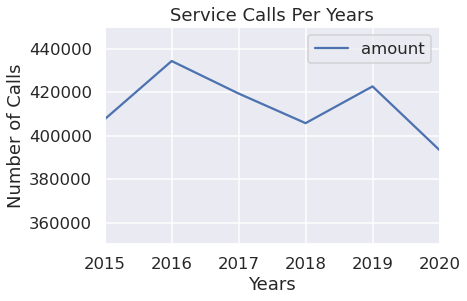

In [18]:
# plot the new dataframe to see changes

ax = pd_num_calls_total.plot( x='year', y='amount', rot=0, title = 'Service Calls Per Years')
ax.set_ylim((350000, 450000))
ax.set_ylabel("Number of Calls")
ax.set_xlabel("Years")

In [11]:
# claculate the changes in amount of services calls between consecutive years

num_15_16 = pd_num_of_calls_2016 - pd_num_of_calls_2015
num_16_17 = pd_num_of_calls_2017 - pd_num_of_calls_2016
num_17_18 = pd_num_of_calls_2018 - pd_num_of_calls_2017
num_18_19 = pd_num_of_calls_2019 - pd_num_of_calls_2018
num_19_20 = pd_num_of_calls_2020 - pd_num_of_calls_2019

# store these values with their respective year in new dataframe
c = {'year': ["15'-16'", "16'-17'", "17'-18'", "18'-19'", "19'-20'"], 
    'amount': [num_15_16, num_16_17, num_17_18, num_18_19, num_19_20]}

pd_num_calls_change = pd.DataFrame(data=c)

Text(0.5, 0, 'Years')

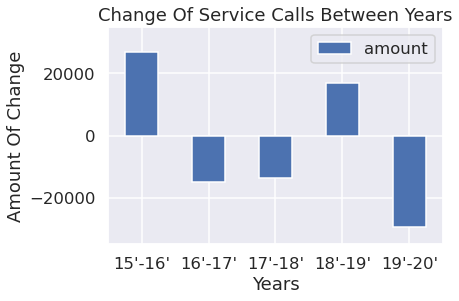

In [16]:
# plot the new dataframe to see changes

ax1 = pd_num_calls_change.plot( kind = 'bar', x='year', y='amount', rot=0, title = 'Change Of Service Calls Between Years')
ax1.set_ylim((-35000, 35000))
ax1.set_ylabel("Amount Of Change")
ax1.set_xlabel("Years")

# Ethics & Privacy

For privacy, the two main things that I to be careful with were the specific addresses and the report id number. Since each report contained a unique report id value, it was important to remove this id since it can violate privacy by identifying specific people involved in a indicent. It was also crucial to remove any specific address values from the reports since those can also be used to obtain the unique report id and private information of individual people. Although I left the beats in the set, they represent vast areas like neighborhoods, so there isn't a privacy issue there.   

As for ethics, this analysis was conducted specifically on the County of San Diego; every dataset reflected the county in some aspect. By analyzing the county of San Diego as a whole, there shouldn't be any bais with the results since no individual neighborhood is being compared to another neighborhood. Another bias that might concern people is that the results of this analysis was based off of only a collection of service calls. However, this shouldn't be a bais at all because these calls refect the needs and safety of the general public.    

# Conclusion & Discussion

Based on this analysis, I can confirm that the CPTED policy does not help decrease the crime rates in the county of San Diego after each year, proving my hypothesis wrong. Although overall the crime rate of 2020 is lower than that of 2015, my hypothesis stated that the crime rate of each year would be lower than the previous. 

The one issue that I encountered was that some of the data didn't match any values in the keys for disposition, priority, and beat. To fix this, I cleaned up the data s.t. only values that were valid according to the keys provided were kept and used for futher analysis. Even after I cleaning, most information in the datasets were retained. 

For the priority cleaning, I only kept those that were priority 3 and lower (2, 1, E) since these are the priority's that affect the safety of the public. For disposition cleaning, I drop reports that wewre duplicates or canceled since I wouldn't want to count a report twice and it a call was canceled, that means that the issue was resolved posing no threat to the safety of the public. 